 # Logistic Regression
   introduction to logistic regression:Logistric Regression is used to predict the probability of an event.
   Logistric regression types:
   1. logistic regression
   2. Binary logistric regression
   3. Multiclass logistric regression
   

In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [23]:
# Load the data
df=sns.load_dataset('titanic')
df.head()   

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [25]:
# Preprocessing the data
#df=df.drop('deck', axis=1, inplace=True)

# imput the missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


In [26]:
# impute the missing values in embarked and embarked town

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [27]:
# Encode the catagorical variables using for loop where object and catagory are present
for col in df.columns:
    if df[col].dtypes=='object' or df[col].dtype=='category':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True


In [29]:
# Split the X and y
X=df.drop('survived',axis=1)
y=df['survived']

In [30]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# call the model
model= LogisticRegression()

In [32]:
# fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# predict the model
y_pred = model.predict(X_test)

In [34]:
# eavaluate the model
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('F1: ',f1_score(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        68

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



<Axes: >

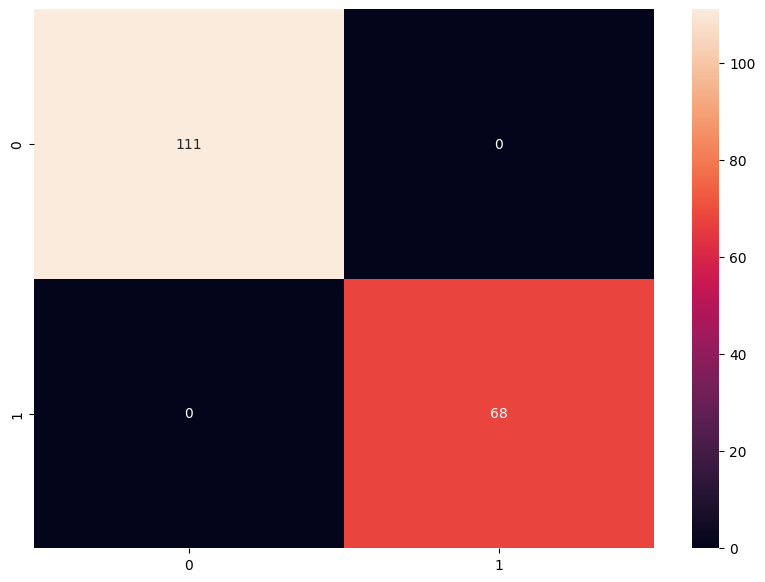

In [35]:
# Plot the confusion matrics
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [37]:
# SAVE THE MODEL    
import pickle
pickle.dump(model, open('./saved_models/model-logistic.pkl', 'wb'))